<a href="https://colab.research.google.com/github/mehraj1234/winter-22/blob/main/Hospital_MINI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pydot
!pip install pydot-ng
!pip install graphviz
!pip install --upgrade scikit-learn==0.20.3
!pip install --upgrade sklearn


     |████████████████████████████████| 5.4 MB 8.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.20.3 which is incompatible.


# Data import

In [3]:
import numpy as np
import pandas as pd 

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


# Data Import

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/mehraj1234/winter-22/main/diabetic_data.csv')

In [5]:
# Data Description
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
# Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


[Text(30.5, 0.5, 'Data Points'),
 Text(0.5, 11.59375, 'Columns'),
 Text(0.5, 1.0, 'Missing Data')]

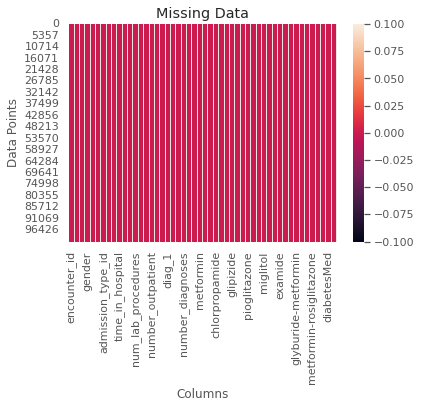

In [8]:
# Missing Data Points
sns.heatmap(df.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')

In [9]:
# names of all features
print(list(df))

['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [10]:
# patient readmit in the hospital within 30days.
df.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

In [11]:
# Tell us patyiemt discharged from hospital
df.groupby('discharge_disposition_id').size()

discharge_disposition_id
1     60234
2      2128
3     13954
4       815
5      1184
6     12902
7       623
8       108
9        21
10        6
11     1642
12        3
13      399
14      372
15       63
16       11
17       14
18     3691
19        8
20        2
22     1993
23      412
24       48
25      989
27        5
28      139
dtype: int64

In [12]:
df['OUTPUT_LABEL'] = (df.readmitted == '<30').astype('int')

In [13]:
# Calculation patient that is readmitted with 30 days.
def calc_prevalence(Y_actual):
  return (sum(Y_actual)/len(Y_actual))

In [14]:
print('Prevalence:%.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

Prevalence:0.112


# Data Cleaning

In [15]:
#df.groupby(['patient_nbr']).count()
df['patient_nbr'].value_counts()

88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
             ..
71081460      1
30060018      1
67443444      1
141344240     1
93251151      1
Name: patient_nbr, Length: 71518, dtype: int64

71,518 unique patient out of 101,766.


In [16]:
df = df.drop_duplicates(subset=['patient_nbr'])



In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71518 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              71518 non-null  int64 
 1   patient_nbr               71518 non-null  int64 
 2   race                      71518 non-null  object
 3   gender                    71518 non-null  object
 4   age                       71518 non-null  object
 5   weight                    71518 non-null  object
 6   admission_type_id         71518 non-null  int64 
 7   discharge_disposition_id  71518 non-null  int64 
 8   admission_source_id       71518 non-null  int64 
 9   time_in_hospital          71518 non-null  int64 
 10  payer_code                71518 non-null  object
 11  medical_specialty         71518 non-null  object
 12  num_lab_procedures        71518 non-null  int64 
 13  num_procedures            71518 non-null  int64 
 14  num_medications      

In [18]:
features_drop_list = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty', 'repaglinide', 'nateglinide', 'chlorpropamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 'acetohexamide', 'tolbutamide']



In [19]:
df.drop(features_drop_list, axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71518 entries, 0 to 101765
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      71518 non-null  object
 1   gender                    71518 non-null  object
 2   age                       71518 non-null  object
 3   admission_type_id         71518 non-null  int64 
 4   discharge_disposition_id  71518 non-null  int64 
 5   admission_source_id       71518 non-null  int64 
 6   time_in_hospital          71518 non-null  int64 
 7   num_lab_procedures        71518 non-null  int64 
 8   num_procedures            71518 non-null  int64 
 9   num_medications           71518 non-null  int64 
 10  number_outpatient         71518 non-null  int64 
 11  number_emergency          71518 non-null  int64 
 12  number_inpatient          71518 non-null  int64 
 13  diag_1                    71518 non-null  object
 14  diag_2               

In [21]:
# Race Feature Fix
df['race'] = df['race'].replace('?', 'Other')

In [22]:
df.race.value_counts()

Caucasian          53491
AfricanAmerican    12887
Other               3126
Hispanic            1517
Asian                497
Name: race, dtype: int64

In [23]:
# Gender Feature Fix
df.gender.value_counts()

Female             38025
Male               33490
Unknown/Invalid        3
Name: gender, dtype: int64

In [24]:
df['gender'] = df['gender'].replace('Unknown/Invalid', 'Female')
df.gender.value_counts()

Female    38028
Male      33490
Name: gender, dtype: int64

In [25]:
# Now change Male and Female into 1 or 0
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df.gender.value_counts()

0    38028
1    33490
Name: gender, dtype: int64

In [26]:
df.change.value_counts()

No    39494
Ch    32024
Name: change, dtype: int64

In [27]:
df['change']=df['change'].replace('No', 0)
df['change']=df['change'].replace('Ch', 1)
df.change.value_counts()



0    39494
1    32024
Name: change, dtype: int64

# EDA

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71518 entries, 0 to 101765
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      71518 non-null  object
 1   gender                    71518 non-null  int64 
 2   age                       71518 non-null  object
 3   admission_type_id         71518 non-null  int64 
 4   discharge_disposition_id  71518 non-null  int64 
 5   admission_source_id       71518 non-null  int64 
 6   time_in_hospital          71518 non-null  int64 
 7   num_lab_procedures        71518 non-null  int64 
 8   num_procedures            71518 non-null  int64 
 9   num_medications           71518 non-null  int64 
 10  number_outpatient         71518 non-null  int64 
 11  number_emergency          71518 non-null  int64 
 12  number_inpatient          71518 non-null  int64 
 13  diag_1                    71518 non-null  object
 14  diag_2               

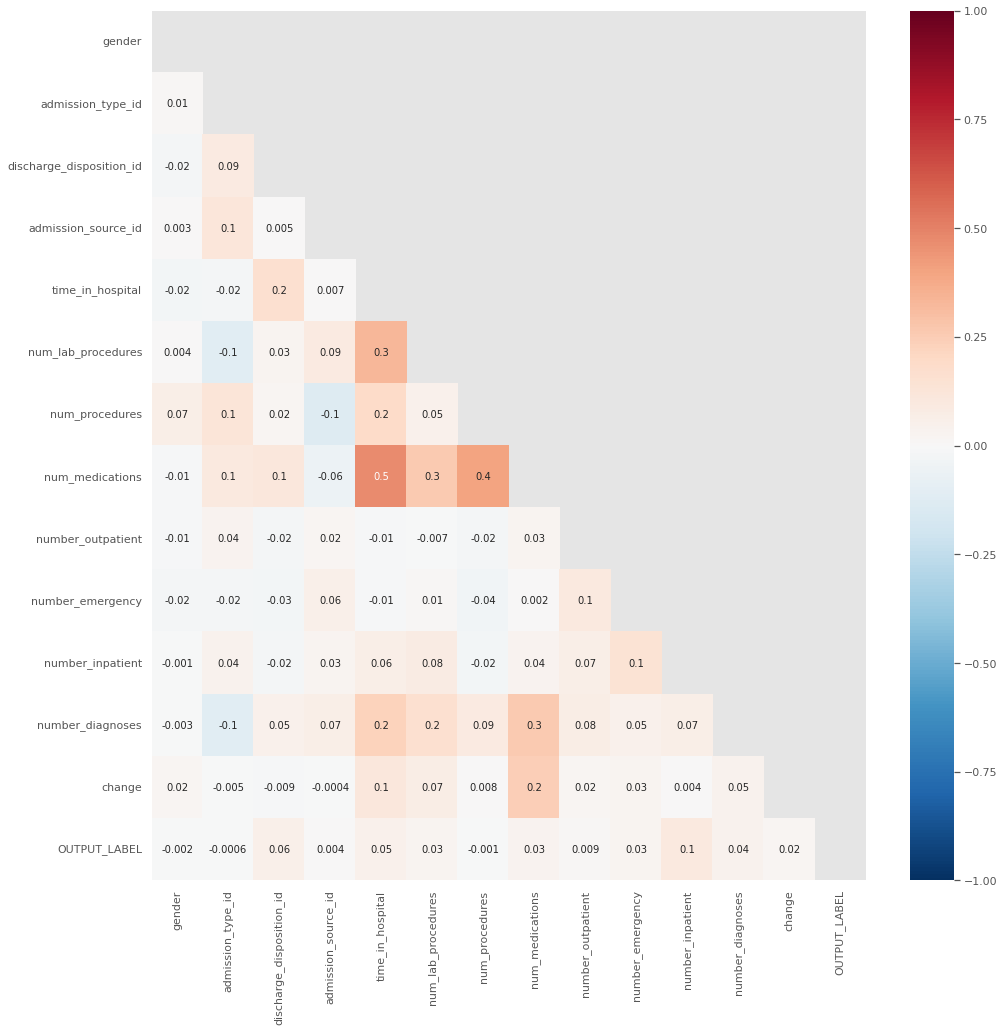

In [29]:
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()


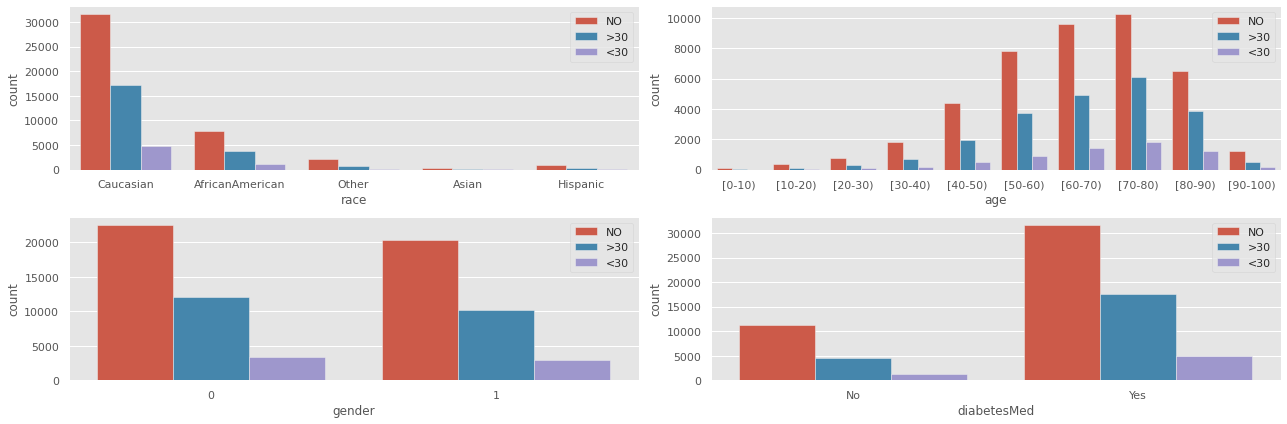

In [30]:
# Time in Hospital and Readmission
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=df, x='race', hue='readmitted', ax=ax1)
sns.countplot(data=df, x='age', hue='readmitted', ax=ax2)
sns.countplot(data=df, x='gender', hue='readmitted', ax=ax3)
sns.countplot(data=df, x='diabetesMed', hue='readmitted', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [31]:
df = pd.concat([df,pd.get_dummies(df['race'], prefix='race')], axis=1).drop(['race'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71518 entries, 0 to 101765
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    71518 non-null  int64 
 1   age                       71518 non-null  object
 2   admission_type_id         71518 non-null  int64 
 3   discharge_disposition_id  71518 non-null  int64 
 4   admission_source_id       71518 non-null  int64 
 5   time_in_hospital          71518 non-null  int64 
 6   num_lab_procedures        71518 non-null  int64 
 7   num_procedures            71518 non-null  int64 
 8   num_medications           71518 non-null  int64 
 9   number_outpatient         71518 non-null  int64 
 10  number_emergency          71518 non-null  int64 
 11  number_inpatient          71518 non-null  int64 
 12  diag_1                    71518 non-null  object
 13  diag_2                    71518 non-null  object
 14  diag_3               

# Model Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Readmission')

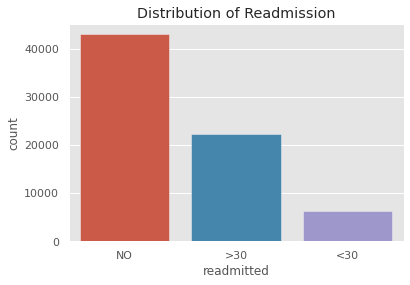

In [33]:
sns.countplot(df['readmitted']).set_title('Distribution of Readmission')

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

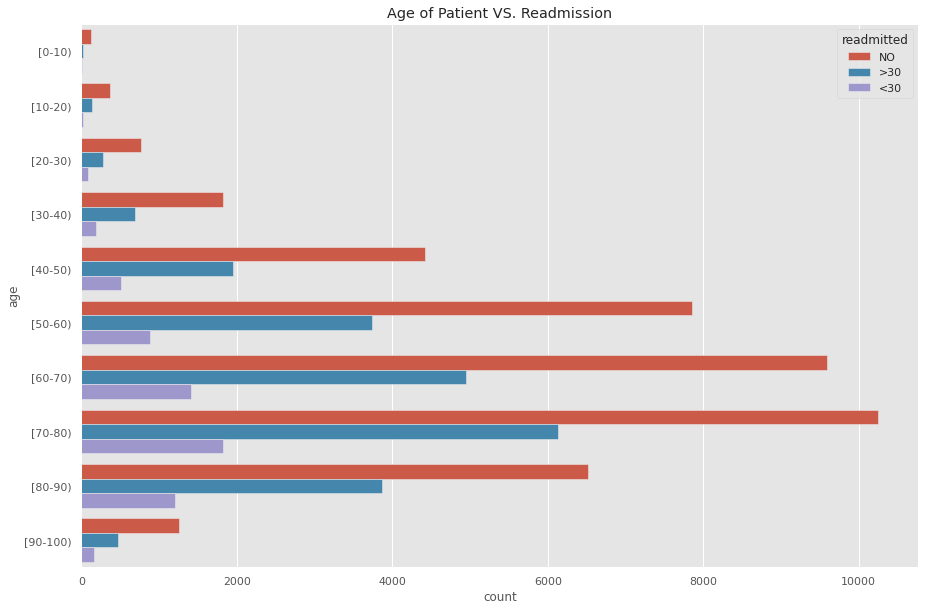

In [35]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

# Pre-Modeling Data Preprocessing

In [37]:
# code age intervals [0-10) - [90-100) from 1-10
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df['age'].value_counts()

8     18210
7     15960
6     12466
9     11589
5      6878
4      2699
10     1900
3      1127
2       535
1       154
Name: age, dtype: int64

In [38]:
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())
# convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)
print(df.age.value_counts())

8     18210
7     15960
6     12466
9     11589
5      6878
4      2699
10     1900
3      1127
2       535
1       154
Name: age, dtype: int64
75    18210
65    15960
55    12466
85    11589
45     6878
35     2699
95     1900
25     1127
15      535
5       154
Name: age, dtype: int64


In [51]:
df['readmitted'].value_counts()

NO     42985
>30    22240
<30     6293
Name: readmitted, dtype: int64